# Library

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
from scipy.optimize import curve_fit
from matplotlib.ticker import AutoMinorLocator

In [2]:
import sys
sys.path.append("/home/jackh/cphmd_tools/cphmd-analysis")
from cphmdanalysis import HH_fitting

# Data File

In [3]:
apo_file = 'data/apo_D34_D214_S_s11_to_64.dat'
holo_file = 'data/holo_D34_D214_S_s21_to_42.dat'

# Collect Data

In [4]:
def data_collect(file):
    data1 = []
    data2 = []
    with open(file, 'r') as f:
        for line in f:
            if '#' not in line:
                split_line = re.split('\s+', line)
                split_line = split_line[:-1]
                dat_list = [float(dat) for dat in split_line]
                data1.append(dat_list)
            if '#!' in line:
                split_line = re.split('\s+', line)
                split_line = split_line[1:-1]
                data2.append([float(split_line[0]), float(split_line[1])])
    return data1, data2

In [5]:
apo_data_s, apo_data_pka = data_collect(apo_file)
holo_data_s, holo_data_pka = data_collect(holo_file)

# Plot Data Settings

## Colors

In [6]:
Color1 = ('#2DFFFE') # Cyan
Color2 = ('') # Black

## Global Settings

In [7]:
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 2
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 2
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['savefig.pad_inches'] = 0

## Params for Inkscape

In [8]:
ink_x = 1.4 # 1.4
ink_y = 1.2 # 1.4

ink_markersize  = 2
ink_linewidth = 1

# Apo Titration Curves

## w/ Labels

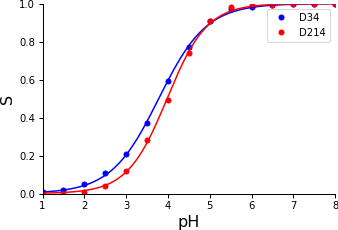

In [16]:
# Fold Cell
plt.close('all')
fig, axes = plt.subplots(figsize= (5,3.5))
fig.set_facecolor('white')

legends = ['D34', 'D214']

axes.set_xlabel('pH', fontsize=16)
axes.set_ylabel('S', fontsize=16)

# Plot Data 
phs = [x[0] for x in apo_data_s]
apo_D34  = [y[1] for y in apo_data_s]
apo_D214 = [y[2] for y in apo_data_s]
axes.plot(phs, apo_D34, 'o',color='Blue', markersize = 5)
axes.plot(phs, apo_D214, 'o',color='Red', markersize = 5)

# D34 Fit
fit_D34 = []
for x in np.linspace(0, 12, 500):
    fit_D34.append([x, HH_fitting(x, apo_data_pka[0][1], apo_data_pka[0][0])])
axes.plot([x[0] for x in fit_D34], [y[1] for y in fit_D34], '-', color='Blue')

# D214 Fit
fit_D214 = []
for x in np.linspace(0, 12, 500):
    fit_D214.append([x, HH_fitting(x, apo_data_pka[1][1], apo_data_pka[1][0])])
axes.plot([x[0] for x in fit_D214], [y[1] for y in fit_D214], '-', color='Red')

axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.legend(legends)
axes.set_ylim(0, 1)
axes.set_xlim(1, 8)

fig.tight_layout()
#plt.savefig("HB_D4.pdf")
plt.show()

## w/o Labels

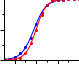

In [17]:
# Fold Cell
plt.close('all')
fig, axes = plt.subplots(figsize= (ink_x, ink_y))

# Plot Data 
phs = [x[0] for x in apo_data_s]
apo_D34  = [y[1] for y in apo_data_s]
apo_D214 = [y[2] for y in apo_data_s]
axes.plot(phs, apo_D34, 'o',color='Blue', markersize=ink_markersize)
axes.plot(phs, apo_D214, 'o',color='Red', markersize=ink_markersize)

# D34 Fit
fit_D34 = []
for x in np.linspace(0, 12, 500):
    fit_D34.append([x, HH_fitting(x, apo_data_pka[0][1], apo_data_pka[0][0])])
axes.plot([x[0] for x in fit_D34], [y[1] for y in fit_D34], '-', color='Blue', linewidth=ink_linewidth)

# D214 Fit
fit_D214 = []
for x in np.linspace(0, 12, 500):
    fit_D214.append([x, HH_fitting(x, apo_data_pka[1][1], apo_data_pka[1][0])])
axes.plot([x[0] for x in fit_D214], [y[1] for y in fit_D214], '-', color='Red', linewidth=ink_linewidth)

axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

# Y-Axis 
axes.set_ylim(0, 1)
axes.set_yticks([0, 0.5, 1])
axes.yaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelleft=False)

# X-Axis
axes.set_xlim(1, 8)
axes.set_xticks([2, 4, 6, 8])
axes.xaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelbottom=False)

fig.tight_layout()
plt.savefig("plots/apo_tcurve.png", dpi=360, transparent=True)
plt.show()

# Holo Titration Curves

## w/ Labels

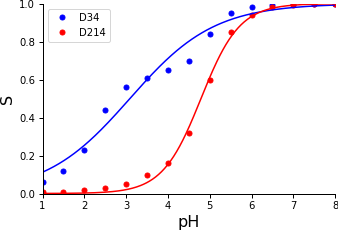

In [15]:
# Fold Cell
plt.close('all')
fig, axes = plt.subplots(figsize= (5,3.5))
fig.set_facecolor('white')

legends = ['D34', 'D214']

axes.set_xlabel('pH', fontsize=16)
axes.set_ylabel('S', fontsize=16)

# Plot Data 
phs = [x[0] for x in holo_data_s]
holo_D34  = [y[1] for y in holo_data_s]
holo_D214 = [y[2] for y in holo_data_s]
axes.plot(phs, holo_D34, 'o',color='Blue', markersize = 5)
axes.plot(phs, holo_D214, 'o',color='Red', markersize = 5)

# D34 Fit
fit_D34 = []
for x in np.linspace(0, 12, 500):
    fit_D34.append([x, HH_fitting(x, holo_data_pka[0][1], holo_data_pka[0][0])])
axes.plot([x[0] for x in fit_D34], [y[1] for y in fit_D34], '-', color='Blue')

# D214 Fit
fit_D214 = []
for x in np.linspace(0, 12, 500):
    fit_D214.append([x, HH_fitting(x, holo_data_pka[1][1], holo_data_pka[1][0])])
axes.plot([x[0] for x in fit_D214], [y[1] for y in fit_D214], '-', color='Red')

axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.legend(legends)
axes.set_ylim(0, 1)
axes.set_xlim(1, 8)

fig.tight_layout()
#plt.savefig("HB_D4.pdf")
plt.show()

## w/o Labels

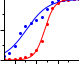

In [18]:
# Fold Cell
plt.close('all')
fig, axes = plt.subplots(figsize= (ink_x, ink_y))

# Plot Data 
phs = [x[0] for x in holo_data_s]
holo_D34  = [y[1] for y in holo_data_s]
holo_D214 = [y[2] for y in holo_data_s]
axes.plot(phs, holo_D34, 'o',color='Blue', markersize=ink_markersize)
axes.plot(phs, holo_D214, 'o',color='Red', markersize=ink_markersize)

# D34 Fit
fit_D34 = []
for x in np.linspace(0, 12, 500):
    fit_D34.append([x, HH_fitting(x, holo_data_pka[0][1], holo_data_pka[0][0])])
axes.plot([x[0] for x in fit_D34], [y[1] for y in fit_D34], '-', color='Blue', linewidth=ink_linewidth)

# D214 Fit
fit_D214 = []
for x in np.linspace(0, 12, 500):
    fit_D214.append([x, HH_fitting(x, holo_data_pka[1][1], holo_data_pka[1][0])])
axes.plot([x[0] for x in fit_D214], [y[1] for y in fit_D214], '-', color='Red', linewidth=ink_linewidth)

axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

# Y-Axis 
axes.set_ylim(0, 1)
axes.set_yticks([0, 0.5, 1])
axes.yaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelleft=False)

# X-Axis
axes.set_xlim(1, 8)
axes.set_xticks([2, 4, 6, 8])
axes.xaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelbottom=False)

fig.tight_layout()
plt.savefig("plots/holo_tcurve.png", dpi=360, transparent=True)
plt.show()